In [1]:
from keras.models import load_model
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from sklearn.metrics import roc_auc_score
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from keras import backend as K
K.clear_session()
config = tf.ConfigProto(gpu_options=tf.GPUOptions(allow_growth=True))
sess = tf.Session(config=config)
K.set_session(sess)

Using TensorFlow backend.


In [2]:
#モデルの読み込み
#①のようにmetricsに自作の関数を使う場合custom_objectsパラメータを指定しないと読み込めない
model_file_name='../model_.09-0.07.hdf5'
model=load_model(model_file_name)
#model_test = load_model('/home/tsato/work/machine_learning/CNN/1orbit/2-3keV_5000/model_.09-0.07.hdf5', custom_objects={'roc_auc':roc_auc})

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Instructions for updating:
Use tf.cast instead.


In [3]:
import os
flare_dir='/home/tsato/work/machine_learning/CNN/images/1orbit/2-3keV_5000/test/flare'
flare_images = os.listdir(flare_dir)

In [4]:
#評価
from keras.preprocessing.image import img_to_array, load_img
import pandas as pd

df = []
for jpeg_name in flare_images:
    img_path = (jpeg_name)
    img = img_to_array(load_img(flare_dir + '/' + img_path, target_size=(32,32)).convert('L'))
    img_nad = img_to_array(img)/255    #0-1に変換
    img_nad = img_nad[None, ...]    #四次元配列に
    label=['0','1']
    pred = model.predict(img_nad, batch_size=1, verbose=0)
    pred_label = label[np.argmax(pred[0])]
    #score = pd.DataFrame(pred)
    score = np.max(pred)
    a=jpeg_name.split("_")
    list=[int(a[0]),jpeg_name,1,pred[0][0],pred[0][1],pred_label]
    df.append(list)
result = pd.DataFrame(df)
result = result.sort_values([0])
result = result.reset_index(drop=True)
result = result.iloc[:,1:6]
flare_result=result

In [5]:
import os
bgd_dir='/home/tsato/work/machine_learning/CNN/images/1orbit/2-3keV_5000/test/background/'
bgd_images = os.listdir(bgd_dir)

In [6]:
#評価
from keras.preprocessing.image import img_to_array, load_img
import pandas as pd

df = []
for jpeg_name in bgd_images:
    img_path = (jpeg_name)
    img = img_to_array(load_img(bgd_dir + '/' + img_path, target_size=(32,32)).convert('L'))
    img_nad = img_to_array(img)/255    #0-1に変換
    img_nad = img_nad[None, ...]    #四次元配列に
    label=['0','1']
    pred = model.predict(img_nad, batch_size=1, verbose=0)
    pred_label = label[np.argmax(pred[0])]
    #score = pd.DataFrame(pred)
    score = np.max(pred)
    a=jpeg_name.split("_")
    #list=[int(a[0]),jpeg_name,pred_label,score]  
    list=[int(a[0]),jpeg_name,0,pred[0][0],pred[0][1],pred_label]
    df.append(list)
result = pd.DataFrame(df)
result = result.sort_values([0])
result = result.reset_index(drop=True)
result = result.iloc[:,1:6]
bgd_result=result

In [7]:
bgd_result

,1,2,3,4,5
0,245_57772.757269-57772.759896.jpg,0,0.998843,0.001157,0
1,245_57409.236366-57409.238970.jpg,0,0.999236,0.000764,0
2,245_58136.187106-58136.189873.jpg,0,0.999833,0.000167,0
3,246_57409.300579-57409.303345.jpg,0,0.999011,0.000989,0
4,246_57772.821481-57772.824294.jpg,0,0.998805,0.001195,0
5,246_58136.251389-58136.254271.jpg,0,0.998854,0.001146,0
6,247_58136.315764-58136.318507.jpg,0,0.999860,0.000140,0
7,247_57409.364861-57409.367627.jpg,0,0.999868,0.000132,0
8,247_57772.885880-57772.888600.jpg,0,0.997919,0.002081,0
9,248_58136.380069-58136.382928.jpg,0,0.491529,0.508471,1


In [9]:
flare_result

,1,2,3,4,5
0,300_55890.283218-55890.285637_mirror.jpg,1,7.094829e-01,0.290517,0
1,300_57627.872269-57627.875266_mirror.jpg,1,2.094743e-03,0.997905,1
2,300_57337.447639-57337.450706.jpg,1,8.786822e-03,0.991213,1
3,300_56250.763380-56250.766516_mirror.jpg,1,3.071805e-04,0.999693,1
4,300_56944.682338-56944.685498.jpg,1,1.931906e-02,0.980681,1
5,300_57627.872269-57627.875266.jpg,1,5.885893e-03,0.994114,1
6,300_56944.682338-56944.685498_mirror.jpg,1,2.132447e-02,0.978676,1
7,300_58076.769907-58076.772905.jpg,1,8.289157e-06,0.999992,1
8,300_57337.447639-57337.450706_mirror.jpg,1,3.324627e-02,0.966754,1
9,300_56250.763380-56250.766516.jpg,1,5.601244e-05,0.999944,1


In [10]:
#0=bgd,1=flare
b_true = bgd_result[2].to_numpy()
f_true = flare_result[2].to_numpy()
true=np.hstack((b_true, f_true))

In [11]:
b_score = bgd_result[4].to_numpy()
f_score = flare_result[4].to_numpy()
score=np.hstack((b_score, f_score))

In [12]:
from sklearn.metrics import roc_curve
roc = roc_curve(true, score)
fpr, tpr, thresholds = roc_curve(true, score)

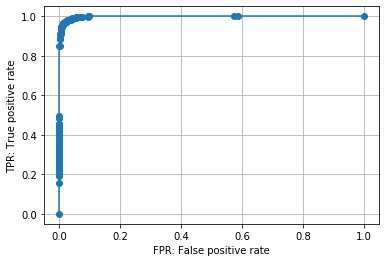

In [13]:
plt.plot(fpr, tpr, marker='o')
plt.xlabel('FPR: False positive rate')
plt.ylabel('TPR: True positive rate')
plt.grid()
#plt.savefig('data/dst/sklearn_roc_curve.png')

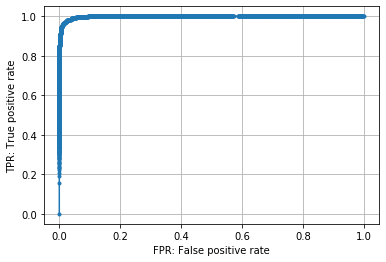

In [15]:
fpr_all, tpr_all, thresholds_all = roc_curve(true, score,
                                             drop_intermediate=False)
plt.plot(fpr_all, tpr_all, marker='.')
plt.xlabel('FPR: False positive rate')
plt.ylabel('TPR: True positive rate')
plt.grid()
plt.savefig('roc_2_3keV.png')

In [16]:
from sklearn import metrics
auc = metrics.roc_auc_score(true, score)
print(auc)

#fpr, tpr, thresholds = metrics.roc_curve(list_label, list_score)
auc = metrics.auc(fpr_all, tpr_all)
print(auc)

0.9981900000000001
0.9981899999999999


In [17]:
#recall
from sklearn.metrics import recall_score
print(recall_score(true, score >= 0.97))

0.904


In [18]:
#precision
from sklearn.metrics import precision_score
print(precision_score(true, score >=0.97))

0.9977924944812362


In [19]:
#f-score
from sklearn.metrics import f1_score
print(f1_score(true,score >=0.97))

0.9485834207764953


In [20]:
Prob_bgd=bgd_result.iloc[:,3]
Prob_flare=flare_result.iloc[:,3]
import matplotlib.pyplot as plt

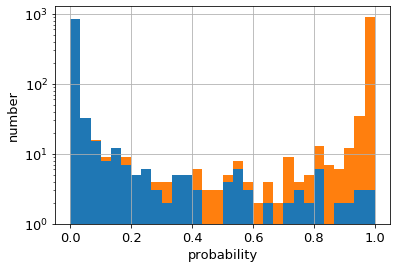

In [21]:
plt.hist([Prob_bgd,Prob_flare],bins=30,stacked=True)
plt.grid(True)
plt.gca().set_yscale("log")
plt.tick_params(labelsize=13)
plt.xlabel('probability',size=13)
plt.ylabel('number',size=13)
plt.savefig('hist_2_3keV.png')